In [62]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from scipy import signal
import math
from math import floor, ceil

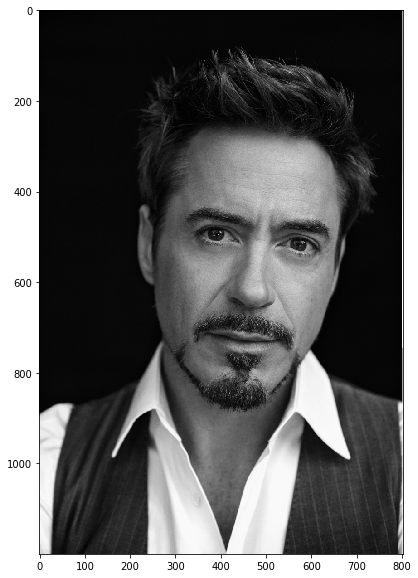

In [63]:
# Reading image
imageDowney = 'rdj.png'
imgDowney = io.imread(imageDowney)
imgDowney = rgb2gray(imgDowney)
# Ensuring that the image is float
imgDowney = ((imgDowney - np.min(imgDowney)) * (1/(np.max(imgDowney) - np.min(imgDowney)) * 1.0)).astype('float')

# Show image
fig1 = plt.figure(figsize = (10, 10))
plt.imshow(imgDowney, cmap='gray')

In [64]:
%matplotlib qt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.figure(figsize=(7,7))
img = mpimg.imread('rdj.png')
imgplot = plt.imshow(img)

coordinates = []

def onclick(event):
    coordinates.append([event.xdata, event.ydata])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [65]:
theta = math.pi/20.0
rotation = np.array([[math.cos(theta), -math.sin(theta), 0], [math.sin(theta), math.cos(theta), 0], [0,0,1]])
translation = np.array([[1, 0, -5], [0, 1, -10], [0, 0, 1]], np.float)
scaling = np.array([[1.1,0,0], [0, 1.1,0], [0,0,1]], np.float)

T = rotation.dot(scaling.dot(translation))
Tinv = np.linalg.inv(T)


print(T)
print(Tinv)
print(coordinates)

[[  1.08645717  -0.17207791  -3.71150676]
 [  0.17207791   1.08645717 -11.7249613 ]
 [  0.           0.           1.        ]]
[[ 0.89789849  0.14221315  5.        ]
 [-0.14221315  0.89789849 10.        ]
 [ 0.          0.          1.        ]]
[[387.3311258278145, 489.0364238410597], [571.7019867549668, 508.1092715231789], [466.8013245033112, 635.2615894039736], [447.728476821192, 781.4867549668875]]


In [66]:
[rows, cols] = imgDowney.shape

transformedDowney = np.zeros((rows,cols))

for i in range(0, rows):
    for j in range(0, cols):
        
        currentPoint = np.array([i,j,1])
        transformedPoint = T.dot(currentPoint)
        newi = int(round(transformedPoint[0]))
        newj = int(round(transformedPoint[1]))
        
        if (newi < 0 or newi >= rows or newj < 0 or newj >= cols):
            continue
            
        transformedDowney[i,j] = imgDowney[newi, newj]
    
fig1 = plt.figure(figsize = (7,7))
plt.imshow(transformedDowney, cmap='gray')
#plt.savefig('transformedDowney.png')

In [67]:
fig = plt.figure(figsize=(7,7))
imgplot = plt.imshow(transformedDowney, cmap='gray')

newCoordinates = []

def onclick(event):
    newCoordinates.append([event.xdata, event.ydata])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [68]:
for i in range(len(coordinates)):
    coordinates[i][0] = int(coordinates[i][0])
    coordinates[i][1] = int(coordinates[i][1])
for j in range(len(newCoordinates)):
    newCoordinates[j][0] = int(newCoordinates[j][0]) 
    newCoordinates[j][1] = int(newCoordinates[j][1])
    
print(coordinates)
print(newCoordinates)

[[387, 489], [571, 508], [466, 635], [447, 781]]
[[289, 500], [452, 546], [341, 649], [301, 774]]


In [69]:
# Affine Transformation

qMatrixList = []
for coord in coordinates:
    qMatrixList.append([coord[0]])
    qMatrixList.append([coord[1]])

qMatrix = np.array(qMatrixList)

Mlist = []
for coord in newCoordinates:
    Mlist.append([coord[0], coord[1], 1, 0, 0, 0])
    Mlist.append([0, 0, 0, coord[1], coord[1], 1])

Mmatrix = np.array(Mlist)

pMatrix = np.linalg.lstsq(Mmatrix, qMatrix)[0]

#pPrimeX = np.array([[coordinates[0][0]], 
#                    [coordinates[1][0]], 
#                    [coordinates[2][0]], 
#                    [coordinates[3][0]], 
#                    [coordinates[4][0]]], np.float)
#pX = np.array([[newCoordinates[0][0], newCoordinates[0][1], 1], 
#               [newCoordinates[1][0], newCoordinates[1][1], 1], 
#               [newCoordinates[2][0], newCoordinates[2][1], 1], 
#               [newCoordinates[3][0], newCoordinates[3][1], 1], 
#               [newCoordinates[4][0], newCoordinates[4][1], 1]], np.float)
#pXinverse = np.linalg.pinv(pX)

#pPrimeY = np.array([[coordinates[0][1]], 
#                    [coordinates[1][1]], 
#                    [coordinates[2][1]], 
#                    [coordinates[3][1]], 
#                    [coordinates[4][1]]], np.float)
#pY = np.array([[newCoordinates[0][0], newCoordinates[0][1], 1], 
#               [newCoordinates[1][0], newCoordinates[1][1], 1], 
#               [newCoordinates[2][0], newCoordinates[2][1], 1], 
#               [newCoordinates[3][0], newCoordinates[3][1], 1], 
#               [newCoordinates[4][0], newCoordinates[4][1], 1]], np.float)
#pYinverse = np.linalg.pinv(pY)

#print(pPrimeX)
#print(pX)
#print(pXinverse)
print(qMatrix)
print(Mmatrix)

[[387]
 [489]
 [571]
 [508]
 [466]
 [635]
 [447]
 [781]]
[[289 500   1   0   0   0]
 [  0   0   0 500 500   1]
 [452 546   1   0   0   0]
 [  0   0   0 546 546   1]
 [341 649   1   0   0   0]
 [  0   0   0 649 649   1]
 [301 774   1   0   0   0]
 [  0   0   0 774 774   1]]


C:\Users\siddh\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [70]:
#transformX = pXinverse.dot(pPrimeX)
#transformY = pYinverse.dot(pPrimeY)
#print(transformX)
#rint(transformY)

In [71]:
#T = np.array([[transformX[0], transformX[1], transformX[2]],
#              [transformY[0], transformY[1], transformY[2]],
#              [0, 0, 1]], np.float)
#Tinv = np.linalg.inv(T)
T = pMatrix.reshape((2, 3))
T = np.append(T, [[0,0,1]], axis = 0)

Tinv = np.linalg.inv(T)
print(T)
print(Tinv)

[[  1.08020158   0.16965546 -10.44952989]
 [  0.55236162   0.55236162 -78.64042205]
 [  0.           0.           1.        ]]
[[  1.09824202  -0.33732024 -15.05089364]
 [ -1.09824201   2.14772843 157.42215722]
 [  0.           0.           1.        ]]


In [73]:
top_left = Tinv.dot(np.array([0.0, 0.0, 1.0], float))
top_left = top_left / top_left[2]

bottom_left = Tinv.dot(np.array([0.0, cols-1.0, 1.0], float))
bottom_left = bottom_left / bottom_left[2]

top_right = Tinv.dot(np.array([rows-1.0, 0.0, 1.0], float))
top_right = top_right / top_right[2]

bottom_right = Tinv.dot(np.array([rows-1.0, cols-1.0, 1.0], float))
bottom_right = bottom_right / bottom_right[2]

min_i = np.min([top_left[0], bottom_left[0], top_right[0], bottom_right[0]])
max_i = np.max([top_left[0], bottom_left[0], top_right[0], bottom_right[0]])

min_j = np.min([top_left[1], bottom_left[1], top_right[1], bottom_right[1]])
max_j = np.max([top_left[1], bottom_left[1], top_right[1], bottom_right[1]])

x_sampling = np.linspace(math.floor(min_i), math.ceil(max_i), math.ceil(max_i) - math.floor(min_i)+1)
y_sampling = np.linspace(math.floor(min_j), math.ceil(max_j), math.ceil(max_j) - math.floor(min_j)+1)

out_im2 = np.zeros((len(x_sampling), len(y_sampling)))

for i in range(0, len(x_sampling)):
    for j in range(0, len(y_sampling)):
        
        cur_pt = np.array([x_sampling[i],y_sampling[j],1.0], float)
        transformed_pt = T.dot(cur_pt)
        
        transformed_pt = transformed_pt / transformed_pt[2]
        
        # Bilinear interpolation
        x = transformed_pt[0]
        y = transformed_pt[1]
        
        xMax = int(math.ceil(x))
        xMin = int(math.floor(x))
        yMax = int(math.ceil(y))
        yMin = int(math.floor(y))
    
        xdiff = x - xMin
        ydiff = y - yMin
    
        try:
            x1 = imgDowney[yMin, xMin] * (1 - xdiff) + imgDowney[yMin, xMax] * xdiff
            x2 = imgDowney[yMax, xMin] * (1 - xdiff) + imgDowney[yMax, xMax] * xdiff
            y = x1 * (1 - ydiff) + x2 * ydiff
            out_im2[i, j] = y
    
        except:
            pass
      
        
fig1 = plt.figure(figsize = (7,7))
plt.imshow(out_im2, cmap='gray')